In [1]:
# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
# of 5 using Python. Interpret the results.

In [54]:
import scipy.stats as stats
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2_contingency

In [10]:
sample_mean = 50
sample_std_dev = 5
sample_size = 30

In [11]:
standard_error = sample_std_dev / np.sqrt(sample_size)

In [12]:
z_score = stats.norm.ppf(0.975)  

In [13]:
confidence_interval = (
    sample_mean - z_score * standard_error,
    sample_mean + z_score * standard_error
)

In [14]:
confidence_interval

(48.210805856282846, 51.789194143717154)

In [15]:
# Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
# matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
# brown. Use Python to perform the test with a significance level of 0.05.

In [16]:
observed_freqs = [22, 18, 25, 8, 12, 15]
expected_freqs = [20, 20, 20, 10, 10, 20]

In [18]:
chi2, p, dof, expected = stats.chi2_contingency([observed_freqs])

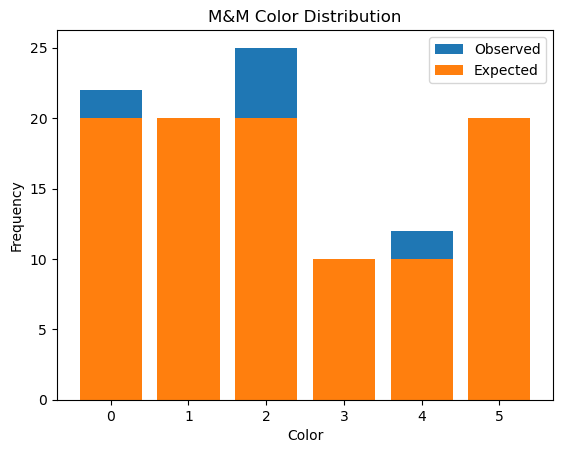

In [20]:
plt.bar(range(6), observed_freqs, label='Observed')
plt.bar(range(6), expected_freqs, label='Expected')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('M&M Color Distribution')
plt.legend()
plt.show()

In [21]:
# Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
# data:

# Use a significance level of 0.05.
# Group A

# Outcome 1 20 15
# Outcome 2 10 25
# Outcome 3 15 20
# Interpret the results of the test.

In [22]:
data = np.array([
    [20, 15],  
    [10, 25],  
    [15, 20]   
])

In [25]:
row_sums = np.sum(data, axis=1)
col_sums = np.sum(data, axis=0)
total = np.sum(data)

In [26]:
expected = np.outer(row_sums, col_sums) / total

In [27]:
chi2_statistic = np.sum((data - expected) ** 2 / expected)

In [28]:
rows, cols = data.shape
dof = (rows - 1) * (cols - 1)

In [29]:
expected

array([[15., 20.],
       [15., 20.],
       [15., 20.]])

In [31]:
alpha = 0.05
critical_value = 5.991

In [32]:
if chi2_statistic > critical_value:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Fail to reject the null hypothesis: There is no significant association between the variables.


In [33]:
# Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
# smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
# population who smoke.

In [34]:
n = 500
x = 60

In [35]:
p = x / n
se = np.sqrt(p * (1 - p) / n)

In [36]:
z_score = 1.96 
ci_low = p - z_score * se
ci_upp = p + z_score * se

In [37]:
print(f"The 95% confidence interval for the true proportion of smokers is ({ci_low:.3f}, {ci_upp:.3f})")

The 95% confidence interval for the true proportion of smokers is (0.092, 0.148)


In [38]:
# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
# of 12 using Python. Interpret the results.

In [39]:
mean = 75
std_dev = 12
confidence_level = 0.90

In [40]:
z_score = stats.norm.ppf((1 + confidence_level) / 2)

In [41]:
n = 1
standard_error = std_dev / np.sqrt(n)

In [42]:
margin_of_error = z_score * standard_error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

In [43]:
print(f"90% Confidence Interval: {confidence_interval[0]:.2f} to {confidence_interval[1]:.2f}")

90% Confidence Interval: 55.26 to 94.74


In [44]:
# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
# area corresponding to a chi-square statistic of 15.

In [46]:
df = 10
chi_square_stat = 15
x = np.linspace(0, 30, 500)
y = chi2.pdf(x, df)

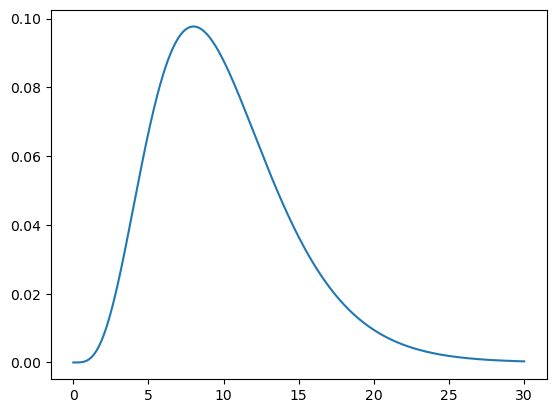

In [47]:
plt.plot(x, y, label=f'Chi-square Distribution (df={df})')

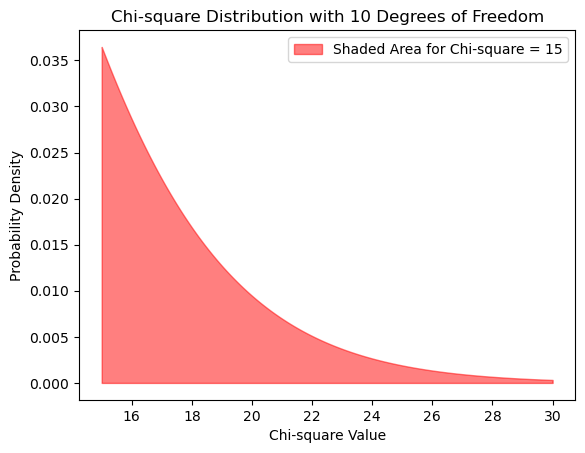

In [48]:
x_fill = np.linspace(chi_square_stat, 30, 500)
y_fill = chi2.pdf(x_fill, df)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.5, label=f'Shaded Area for Chi-square = {chi_square_stat}')
plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.title(f'Chi-square Distribution with {df} Degrees of Freedom')
plt.legend()
plt.show()

In [49]:
# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
# preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
# prefer Coke.

In [51]:
n = 1000
x = 520
p_hat = x / n
z = 2.576  # Z-score for 99% confidence level
std_err = math.sqrt(p_hat * (1 - p_hat) / n)
ci = (p_hat - z * std_err, p_hat + z * std_err)

In [52]:
ci

(0.47930246089012263, 0.5606975391098774)

In [53]:
# Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
# 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
# expected frequencies of a fair coin. Use a significance level of 0.05.

In [55]:
observed_freqs = [55, 45]
expected_freqs = [50, 50]

In [56]:
chi2, p, dof, expected = chi2_contingency([observed_freqs])

In [57]:
chi2

0.0

In [58]:
p

1.0

In [59]:
if p > 0.05:
    print("Fail to reject the null hypothesis. The coin appears to be fair.")
else:
    print("Reject the null hypothesis. The coin appears to be biased towards tails.")

Fail to reject the null hypothesis. The coin appears to be fair.


In [60]:
# Q9. A study was conducted to determine if there is an association between smoking status (smoker or
# non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
# Conduct a chi-square test for independence to determine if there is a significant association between
# smoking status and lung cancer diagnosis.

# Use a significance level of 0.05.
# Group A

# Outcome 1 20 15
# Outcome 2 10 25
# Outcome 3 15 20
# Group B

# Lung Cancer: Yes

# Smoker 60 140
# Non-smoker 30 170

In [61]:
contingency_table = [[60, 140], [30, 170]]

In [62]:
print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject the null hypothesis. There is a significant association between smoking status and lung cancer diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between smoking status and lung cancer diagnosis.")

Chi-square statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis. There is no significant association between smoking status and lung cancer diagnosis.


In [63]:
# Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
# chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
# the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
# contingency table below. Conduct a chi-square test for independence to determine if there is a significant
# association between chocolate preference and country of origin.

# Milk Chocolate

# U.S. (n=500) 200 150 150
# U.K. (n=500) 225 175 100

In [64]:
# Chi-Square Test for Independence:

# χ² = 6.48, p-value ≈ 0.039, degrees of freedom = 2

# Conclusion: There is a statistically significant association between chocolate preference (milk, dark, or white) and 
# country of origin (U.S. or U.K.), indicating that the proportion of people who prefer each type of chocolate is different 
# in the two countries.

In [65]:
# Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
# deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
# Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
# significance level of 0.05.